# Capstone Project Notebook

This notebook walks through the implementation and analysis of the Insider Trading Machine Learning Project. It walks through using the created dataset. The code for (1) pulling Form 4 data from EDGAR and (2) creating the dataset is in form4_pull.py and create_dataset.py, respectively.

To start we load the dataset into a Pandas Dataframe.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset_6_12_spy_alt_norm.csv")

## Data Pre-Processing

Next, we conduct some simple data preprocessing. While we gathered return data for 1 (RET1), 6 (RET6), and 12 (RET12) months, we are only using RET12 data in this demo since this data provided the best results. Thus, we drop missing datapoints for RET12 ('None': points for which data was not available, 'Fail': points for which data failed to download, and any NaN values). We also drop the COMPANY ticker and MONTH columns, and cleanup the market cap category data. We also renamed RET12 as RET.

Finally, we define a function to separate the non-binary discrete variables into multiple binary variables using the get_dummies function. We use this function later on to split market sector data into 10 binary variables, and market cap data into 3 binary variables.


In [3]:
#Cleanup dataset

dataset = dataset[dataset.RET12 != 'None']
dataset = dataset[dataset.RET12 != 'Fail']
dataset.dropna(axis=0, inplace=True)
dataset = dataset.drop(['COMPANY'], axis=1)
dataset = dataset.drop(['MONTH'], axis=1)
dataset = dataset.drop(['RET1'], axis=1)
dataset = dataset.drop(['RET6'], axis=1)
dataset.rename(index=str, columns={'RET12': 'RET'}, inplace=True)
dataset['MKTCAP'].replace('.*Small.', 'small', inplace=True, regex=True)
dataset['MKTCAP'].replace('.*Mid.', 'mid', inplace=True, regex=True)
dataset['MKTCAP'].replace('.*Large.', 'large', inplace=True, regex=True)

#Create binary variables for non-binary discrete variables
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    return output



Below is a sample of the dataset for visualization purposes.

In [4]:
dataset.head(10)

,NBC1,NBC2,NBC3,NBC4,NBC5,NBC6,NBC7,NBC8,NBC9,NBC10,...,NBV6,NBV7,NBV8,NBV9,NBV10,NBV11,NBV12,SECTOR,MKTCAP,RET
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Health Care,mid,-0.172941746714
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Health Care,mid,-0.0150660419401
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Health Care,mid,-7.44391884623e-05
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089069,Health Care,mid,-0.0846813940397
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089069,0.005034,Health Care,mid,-0.200503849076
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.160714,...,0.000000,0.000000,0.000000,0.000000,0.089069,0.005034,0.989108,Health Care,mid,-0.165907802061
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.160714,0.202381,...,0.000000,0.000000,0.000000,0.089069,0.005034,0.989108,0.053128,Health Care,mid,-0.269385255117
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.160714,0.202381,-0.071429,...,0.000000,0.000000,0.089069,0.005034,0.989108,0.053128,0.057414,Health Care,mid,-0.136214279481
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.160714,0.202381,-0.071429,-0.017857,...,0.000000,0.089069,0.005034,0.989108,0.053128,0.057414,0.003005,Health Care,mid,-0.125907415704
9,0.0,0.0,0.0,0.0,0.0,0.160714,0.202381,-0.071429,-0.017857,0.065476,...,0.089069,0.005034,0.989108,0.053128,0.057414,0.003005,0.003005,Health Care,mid,-0.0150232631055


# Statistics




The code below generates statistics on return, normalized net buy count, and normalized net buy volume across the dataset.

In [5]:
ret_data = dataset['RET'].apply(pd.to_numeric, errors='coerce')
min_return = np.min(ret_data)
max_return = np.max(ret_data)
mean_return = np.mean(ret_data)
median_return = np.median(ret_data)
std_return = np.std(ret_data)
fq_return = np.percentile(ret_data,25)
tq_return = np.percentile(ret_data,75)
ft_return = np.percentile(ret_data,33)
st_return = np.percentile(ret_data,66)
print "Min return: " + str(min_return)
print "Max return: " + str(max_return)
print "Mean return: " + str(mean_return)
print "Median return: " + str(median_return)
print "Std Dev of return: " + str(std_return)
print "First quartile: " + str(fq_return)
print "Third quartile: " + str(tq_return)
print "First third: " + str(ft_return)
print "Second third: " + str(st_return)

all_nbc = np.concatenate([dataset['NBC' + str(i)].apply(pd.to_numeric, errors='coerce') for i in range(1,13)])
min_nbc = min(all_nbc)
max_nbc = max(all_nbc)
mean_nbc = np.mean(all_nbc)
median_nbc = np.median(all_nbc)
std_nbc = np.std(all_nbc)
fq_nbc = np.percentile(all_nbc, 25)
tq_nbc = np.percentile(all_nbc, 75)
print "Min NBC: " + str(min_nbc)
print "Max NBC: " + str(max_nbc)
print "Mean NBC: " + str(mean_nbc)
print "Median NBC: " + str(median_nbc)
print "Std NBC: " + str(std_nbc)
print "FQ NBC: " + str(fq_nbc)
print "TQ NBC: " + str(tq_nbc)

all_nbv = np.concatenate([dataset['NBV' + str(i)].apply(pd.to_numeric, errors='coerce') for i in range(1,13)])
min_nbv = min(all_nbv)
max_nbv = max(all_nbv)
mean_nbv = np.mean(all_nbv)
median_nbv = np.median(all_nbv)
std_nbv = np.std(all_nbv)
fq_nbv = np.percentile(all_nbv, 25)
tq_nbv = np.percentile(all_nbv, 75)
print "Min NBV: " + str(min_nbv)
print "Max NBV: " + str(max_nbv)
print "Mean NBV: " + str(mean_nbv)
print "Median NBV: " + str(median_nbv)
print "Std NBV: " + str(std_nbv)
print "FQ NBV: " + str(fq_nbv)
print "TQ NBV: " + str(tq_nbv)


Min return: -0.935858888252
Max return: 256.921787964
Mean return: 0.037375337105
Median return: 0.00476292075858
Std Dev of return: 0.887738362548
First quartile: -0.129435886468
Third quartile: 0.153846798354
First third: -0.0820028933886
Second third: 0.0923269618164
Min NBC: -1.0
Max NBC: 1.0
Mean NBC: 0.0161937410671
Median NBC: 0.0
Std NBC: 0.202602555863
FQ NBC: -0.0113122171946
TQ NBC: 0.0185185185185
Min NBV: -1.0
Max NBV: 1.0
Mean NBV: 0.00188582097983
Median NBV: 0.0
Std NBV: 0.119143472668
FQ NBV: -0.00116961416493
TQ NBV: 0.0


A histogram of return data shows that the returns are roughly normally distributed.

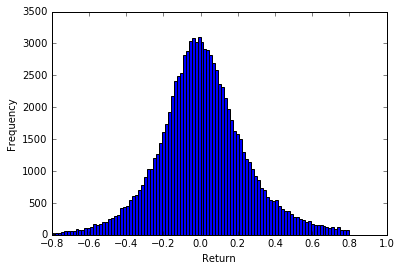

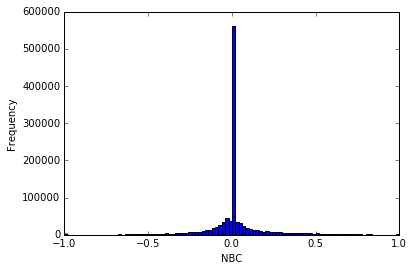

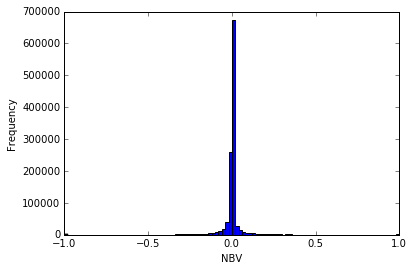

In [6]:
plt.hist(ret_data, bins=100, range=(-.8,.8))
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.show()

plt.hist(all_nbc, bins=100, range=(-1,1))
plt.ylabel('Frequency')
plt.xlabel('NBC')
plt.show()

plt.hist(all_nbv, bins=100, range=(-1,1))
plt.ylabel('Frequency')
plt.xlabel('NBV')
plt.show()

# Model Training

## More Data Pre-Processing

Based on the statistics, we decide to divide the target set into three categories:
'above' = returns on the 3rd third of the data (higher than 2/3 of returns)
'middle' = returns on the 2nd third of the data (between 1/3 and 2/3 of returns).
'below' = returns on the 1st third of the data (below 1/3 of returns). This is done because of the assumption that creating a meaningful regression is a too ambitious goal for this project.

We then randomly shuffle and split the dataset into training and testing sets.


In [7]:
from sklearn.cross_validation import train_test_split

#Divide target set into 3 classes, and create new RETURN_CAT column
dataset.loc[(dataset.RET.astype(np.float64) > ft_return) & (dataset.RET.astype(np.float64) < st_return), 'RETURN_CAT'] = np.str('STABLE')
dataset.loc[(dataset.RET.astype(np.float64) >= st_return), 'RETURN_CAT'] = np.str('UP')
dataset.loc[(dataset.RET.astype(np.float64) <= ft_return), 'RETURN_CAT'] = np.str('DOWN')

#Separate dataset into feature and target sets
feature_cols = list(dataset.columns[:-2])
target_col = dataset.columns[-1]

#Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

#Separate data into feature data and target data
X_all = dataset[feature_cols]
y_all = dataset[target_col]

#Pre-process feature dataset to create binary variables
X_all = preprocess_features(X_all)

/Users/gamephase/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature columns:
['NBC1', 'NBC2', 'NBC3', 'NBC4', 'NBC5', 'NBC6', 'NBC7', 'NBC8', 'NBC9', 'NBC10', 'NBC11', 'NBC12', 'NBV1', 'NBV2', 'NBV3', 'NBV4', 'NBV5', 'NBV6', 'NBV7', 'NBV8', 'NBV9', 'NBV10', 'NBV11', 'NBV12', 'SECTOR', 'MKTCAP']

Target column: RETURN_CAT


# Model Training

Finally, we train the model using two classifiers, (1) Naive Bayes and (2) an Ensemble of Naive Bayes learners using bagging. We first use k-fold cross validation to train the models and evaluate their performance.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from time import time
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

def performance_metric(y_true, y_pred):
    return f1_score(y_true,y_pred,average='weighted')

def cross_validation(clf, X_train, y_train, fit_params=None):
    cv_iters = 10
    cv_sets = ShuffleSplit(X_train.shape[0], n_iter=cv_iters, test_size=0.2, random_state=0)
    scoring_fnc = make_scorer(performance_metric)  

    start = time()
    scores = cross_val_score(clf, X_train, y=y_train, fit_params=fit_params, scoring=scoring_fnc, cv=cv_sets)
    end = time()

    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    print "\nCross-Validation scores for {} using {} iterations:\n".format(clf.__class__.__name__,cv_iters)
    print scores
    print("F1 Score: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    print '\n\n'
    
clf_A = GaussianNB()
clf_B = BaggingClassifier(clf_A, random_state=2)

cross_validation(clf_A,X_all,y_all)
cross_validation(clf_B,X_all,y_all)

Trained model in 3.6522 seconds

Cross-Validation scores for GaussianNB using 10 iterations:

[ 0.39554232  0.40195589  0.40117247  0.40674428  0.40035989  0.40263315
  0.40679165  0.40478973  0.4016804   0.39069539]
F1 Score: 0.4012 (+/- 0.0094)



Trained model in 20.2808 seconds

Cross-Validation scores for BaggingClassifier using 10 iterations:

[ 0.3950434   0.40065071  0.40261885  0.40768199  0.39939588  0.40323529
  0.4041422   0.403398    0.39548808  0.39085309]
F1 Score: 0.4003 (+/- 0.0097)





The cross-validations scores indicate the models perform a bit better than the benchmark of 0.33. Next, we look into more details of how the models perform in classifying each class, using the classification_report function.

In [9]:
from sklearn.metrics import classification_report
    
def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    print "Classification Report: \n" + str(classification_report(target,y_pred))

#We arbitrarily set the number of training points to 80%
num_train = int(X_all.shape[0]*0.8)

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = num_test, random_state = 1)

clf_A.fit(X_train, y_train)
clf_B.fit(X_train, y_train)

print "Results for NB:"
predict_labels(clf_A, X_test, y_test)
print '\n\n'
print "Results for Bagging:"
predict_labels(clf_B, X_test, y_test)

Results for NB:
Made predictions in 0.0304 seconds.
Classification Report: 
             precision    recall  f1-score   support

       DOWN       0.43      0.37      0.40      6341
     STABLE       0.41      0.43      0.42      6377
         UP       0.39      0.42      0.40      6572

avg / total       0.41      0.41      0.40     19290




Results for Bagging:
Made predictions in 0.3473 seconds.
Classification Report: 
             precision    recall  f1-score   support

       DOWN       0.43      0.36      0.39      6341
     STABLE       0.40      0.43      0.42      6377
         UP       0.39      0.43      0.41      6572

avg / total       0.41      0.41      0.41     19290



The results indicate the models are classifying each label with roughly equal precision and recall. 

## Parameter Optimization

We next try to tune parameters of the ensemble model using GridSearch and cross-validation. NOTE: The code below takes a long time to run, but results are copied below.

***NOTE THE FOLLOWING BLOCK TAKES A LONG TIME TO RUN, BUT CAN BE SKIPPED***

In [ ]:
# THIS BLOCK WILL TAKE A LONG TIME TO RUN
# YOU CAN SKIP AND THE REST OF THE BLOCKS WILL STILL WORK
from sklearn.grid_search import GridSearchCV

def train_classifierGS(clf, X_train, y_train, params=None):
    cv_iters = 2
    cv_sets = ShuffleSplit(X_train.shape[0], n_iter=cv_iters, test_size=0.20, random_state=0)
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)
    grid.fit(X_train, y_train)
    print "best_params_ for the optimal model are: {}.".format(str(grid.best_params_))
    return grid.best_estimator_

params={'n_estimators': [1,10,100,500,1000], 'max_samples': [0.3,0.5,1.0], 'max_features': [0.3,0.5,1.0]}
best_bagging_clf = train_classifierGS(clf_B, X_train, y_train, params=params)

The results of the grid search indicate the following are the best parameters:

best_params_ for the optimal model are: {'max_features': 0.3, 'max_samples': 0.5, 'n_estimators': 100}.



In [43]:
print "Results for Bagging:"
cross_validation(best_bagging_clf,X_all,y_all)
predict_labels(best_bagging_clf, X_test, y_test)

Results for Bagging:
Trained model in 54.7251 seconds

Cross-Validation scores for BaggingClassifier using 10 iterations:

[ 0.39726444  0.40226551  0.40427847  0.40923715  0.40187027  0.40537049
  0.40609196  0.40498949  0.39806448  0.39302724]
F1 Score: 0.4022 (+/- 0.0092)



Made predictions in 0.9440 seconds.
Classification Report: 
             precision    recall  f1-score   support

      above       0.40      0.44      0.42      6572
      below       0.43      0.37      0.40      6341
     middle       0.41      0.42      0.42      6377

avg / total       0.41      0.41      0.41     19290



The results with the optimal parameters (F1 Score: 0.4022) were only marginally better than with the default parameters (F1 Score: 0.4003).

## Model Validation

The code below performs all the preprocessing steps again using new variable, in order to preserve the Company, Month, and Return numbers for each datapoint. Then we obtain the top confidence predictions that the model yields in order to assess their performance. See the Model Evaluation and Validation Section of the report for more details on these portions.

In [26]:

#Repeat preprocessing from the start to preserve COMPANY, MONTH, and RAW RETURN numbers
dataset2 = pd.read_csv("dataset_6_12_spy_alt_norm.csv")
dataset2 = dataset2[dataset2.RET12 != 'None']
dataset2 = dataset2[dataset2.RET12 != 'Fail']
dataset2.dropna(axis=0, inplace=True)
dataset2 = dataset2.drop(['RET6'], axis=1)
dataset2 = dataset2.drop(['RET1'], axis=1)
dataset2.rename(index=str, columns={'RET12': 'RET'}, inplace=True)
dataset2['MKTCAP'].replace('.*Small.', 'small', inplace=True, regex=True)
dataset2['MKTCAP'].replace('.*Mid.', 'mid', inplace=True, regex=True)
dataset2['MKTCAP'].replace('.*Large.', 'large', inplace=True, regex=True)
ret_data = dataset2['RET'].apply(pd.to_numeric, errors='coerce')

y_raw = dataset2['RET']

dataset2.loc[(dataset2.RET.astype(np.float64) > ft_return) & (dataset2.RET.astype(np.float64) < st_return), 'RETURN_CAT'] = np.str('STABLE')
dataset2.loc[(dataset2.RET.astype(np.float64) <= ft_return), 'RETURN_CAT'] = np.str('DOWN')
dataset2.loc[(dataset2.RET.astype(np.float64) >= st_return), 'RETURN_CAT'] = np.str('UP')

#Extract the feature and target columns
feature_cols = list(dataset2.columns[:-2])
target_col = dataset2.columns[-1]

#Separate data into feature data and target data
X_all2 = dataset2[feature_cols]
y_all2 = dataset2[target_col]

num_train2 = 80000

# Set the number of testing points
num_test2 = X_all2.shape[0] - num_train2

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train2, X_test2, y_train2, y_test2, y_train_raw, y_test_raw = train_test_split(X_all2, y_all2, y_raw, test_size = num_test2, random_state = 1)
X_company = X_test2['COMPANY']
X_month = X_test2['MONTH']
X_test2 = X_test2.drop(['MONTH'], axis=1)
X_test2 = X_test2.drop(['COMPANY'], axis=1)
X_train2 = X_train2.drop(['MONTH'], axis=1)
X_train2 = X_train2.drop(['COMPANY'], axis=1)

X_train2 = preprocess_features(X_train2)
X_test2 = preprocess_features(X_test2)

#Obtain li
learner = GaussianNB()
final_clf = BaggingClassifier(learner, max_features=0.3, max_samples=0.5, n_estimators=100,random_state=3)
final_clf.fit(X_train2,y_train2)
#final_clf = clf_A
prob_pos_clf = final_clf.predict_proba(X_test2)[:,0]
sorted_prob = zip(X_company,X_month,final_clf.predict(X_test2),y_test2,y_test_raw,prob_pos_clf)
sorted_prob_df = pd.DataFrame(sorted_prob)
sorted_prob_df.sort_values(5,ascending=False,inplace=True)
print sorted_prob_df.head(40)

from sklearn.metrics import brier_score_loss
clf_score = brier_score_loss(y_test2, prob_pos_clf, pos_label='DOWN')
print("Brier Score: %1.3f" % clf_score)

          0        1     2       3                 4         5
15960   UNT  2011-06  DOWN    DOWN   -0.104260989149  0.701770
9098   SLCA  2013-06  DOWN    DOWN   -0.458631326212  0.678251
7754    UNT  2011-03  DOWN    DOWN   -0.160898545378  0.673817
4312    EEQ  2013-11  DOWN    DOWN   -0.232851191059  0.642364
616     WLL  2012-02  DOWN  STABLE   0.0100388284056  0.622348
7797   SLCA  2012-07  DOWN      UP     1.19795096909  0.621403
13244   NGL  2012-07  DOWN      UP    0.223497806037  0.614668
5773   ENLC  2014-03  DOWN    DOWN   -0.734449961872  0.611460
12004   MDR  2013-09  DOWN    DOWN   -0.283808352244  0.610698
9609    WGP  2014-06  DOWN    DOWN   -0.320706536349  0.608916
15691   BWP  2013-11  DOWN    DOWN   -0.254832641306  0.608861
7689   ENBL  2014-03  DOWN    DOWN   -0.636109502496  0.606810
12533  CVRR  2012-12  DOWN  STABLE  -0.0175873114779  0.605505
13183   UNT  2011-08  DOWN    DOWN   -0.128695085235  0.604216
2393    GEL  2012-08  DOWN  STABLE  -0.0726908388025  0

Below we compute the mean return for all predictions with a probability at or above 0.60.

In [34]:
high_prob_picks = sorted_prob_df[sorted_prob_df[5]>=0.60]
high_prob_picks.sort_values(1,ascending=True,inplace=True)
print high_prob_picks.head(30)
high_prob_picks[4].apply(pd.to_numeric, errors='coerce').mean()

          0        1     2       3                 4         5
7754    UNT  2011-03  DOWN    DOWN   -0.160898545378  0.673817
1255    KOS  2011-04  DOWN    DOWN   -0.256496072168  0.600888
12079   GEL  2011-04  DOWN      UP     0.46960215203  0.601394
15960   UNT  2011-06  DOWN    DOWN   -0.104260989149  0.701770
13183   UNT  2011-08  DOWN    DOWN   -0.128695085235  0.604216
616     WLL  2012-02  DOWN  STABLE   0.0100388284056  0.622348
7797   SLCA  2012-07  DOWN      UP     1.19795096909  0.621403
13244   NGL  2012-07  DOWN      UP    0.223497806037  0.614668
2393    GEL  2012-08  DOWN  STABLE  -0.0726908388025  0.603567
12533  CVRR  2012-12  DOWN  STABLE  -0.0175873114779  0.605505
9098   SLCA  2013-06  DOWN    DOWN   -0.458631326212  0.678251
12004   MDR  2013-09  DOWN    DOWN   -0.283808352244  0.610698
15691   BWP  2013-11  DOWN    DOWN   -0.254832641306  0.608861
4312    EEQ  2013-11  DOWN    DOWN   -0.232851191059  0.642364
5773   ENLC  2014-03  DOWN    DOWN   -0.734449961872  0

/Users/gamephase/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


-0.1035840351874